In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/Amazon ML')


In [6]:
import os

# Change directory to your project folder (use quotes for the space)
os.chdir("/content/drive/MyDrive/Amazon ML/student_resource/dataset")

# Confirm we are inside the folder and list files
!pwd
!ls


/content/drive/MyDrive/Amazon ML/student_resource/dataset
sample_test.csv  sample_test_out.csv  test.csv	train.csv


In [7]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (75000, 4)
Test shape: (75000, 3)


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [8]:
print("\n Dataset Info:")
train.info()

# Missing Value
print("\n Missing Values in Each Column:")
print(train.isnull().sum())

# Duplicates
duplicates = train.duplicated().sum()
print(f"\n Number of Duplicate Rows: {duplicates}")

# Unique values per column
print("\n Unique Value Counts:")
for col in train.columns:
    print(f"{col}: {train[col].nunique()} unique values")

# Check data types
print("\n Column Data Types:")
print(train.dtypes)

#  numeric columns
print("\n Numeric Summary (describe):")
display(train.describe())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB

 Missing Values in Each Column:
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

 Number of Duplicate Rows: 0

 Unique Value Counts:
sample_id: 75000 unique values
catalog_content: 74900 unique values
image_link: 72288 unique values
price: 11862 unique values

 Column Data Types:
sample_id            int64
catalog_content     object
image_link          object
price              float64
dtype: object

 Numeric Summary (describe):


,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


Phase 2 : Text analysis

 Text length summary:
count    75000.000000
mean       908.886547
std        852.896151
min         32.000000
25%        251.000000
50%        643.000000
75%       1280.000000
max       7894.000000
Name: text_length, dtype: float64 

 Word count summary:
count    75000.000000
mean       147.851693
std        137.068731
min          7.000000
25%         42.000000
50%        104.000000
75%        208.000000
max       1333.000000
Name: word_count, dtype: float64


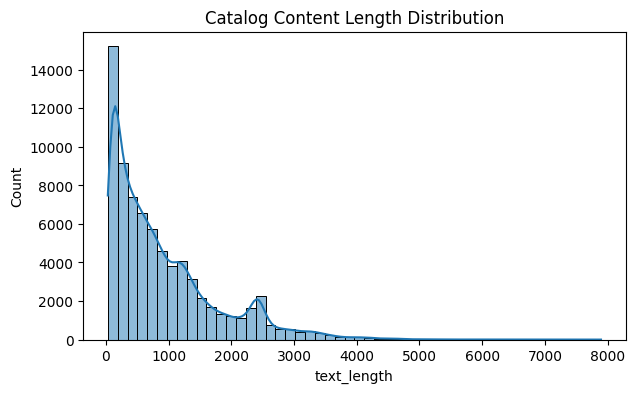

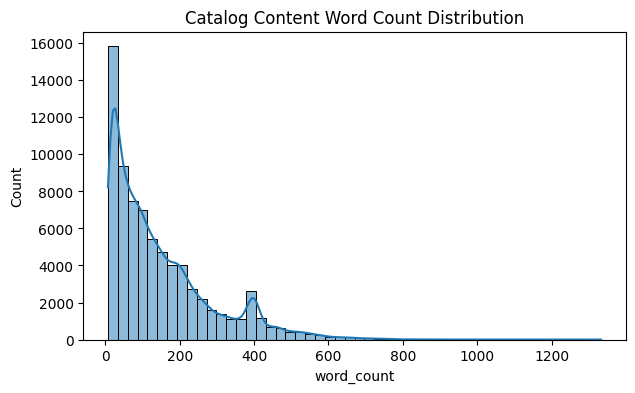


 IPQ Value Counts:
IPQ
1     57459
6      4287
12     3565
2      2187
3      1923
4      1622
24      865
8       788
10      385
5       318
Name: count, dtype: int64


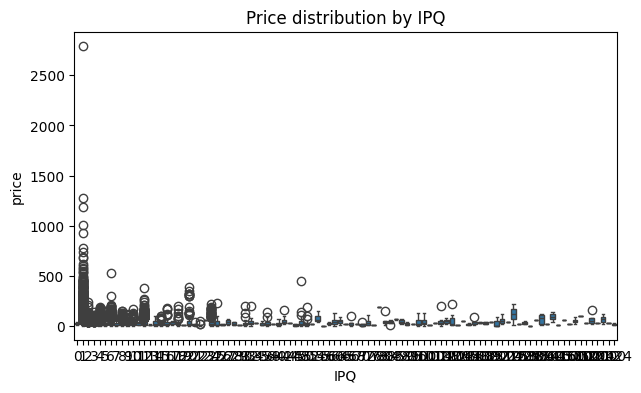

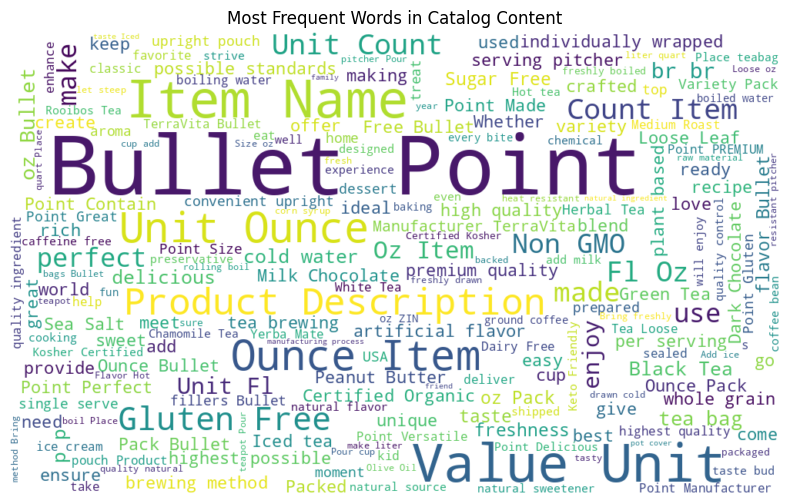


 Top 15 frequent words:
['bullet' 'coffee' 'flavor' 'free' 'item' 'natural' 'ounce' 'oz' 'pack'
 'point' 'product' 'taste' 'tea' 'unit' 'value']


In [9]:

import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

train['text_length'] = train['catalog_content'].astype(str).apply(len)
train['word_count']  = train['catalog_content'].astype(str).apply(lambda x: len(x.split()))

print(" Text length summary:")
print(train['text_length'].describe(), "\n")

print(" Word count summary:")
print(train['word_count'].describe())


plt.figure(figsize=(7,4))
sns.histplot(train['text_length'], bins=50, kde=True)
plt.title("Catalog Content Length Distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(train['word_count'], bins=50, kde=True)
plt.title("Catalog Content Word Count Distribution")
plt.show()


def extract_ipq(text):
    text = str(text)
    # Look for "IPQ: X" or "Pack of X"
    match = re.search(r'IPQ[: ]*(\d+)', text)
    if match:
        return int(match.group(1))
    match = re.search(r'[Pp]ack\s*[Oo]f\s*(\d+)', text)
    if match:
        return int(match.group(1))
    return 1

train['IPQ'] = train['catalog_content'].apply(extract_ipq)
print("\n IPQ Value Counts:")
print(train['IPQ'].value_counts().head(10))

plt.figure(figsize=(7,4))
sns.boxplot(x='IPQ', y='price', data=train)
plt.title("Price distribution by IPQ")
plt.show()

all_words = ' '.join(train['catalog_content'].astype(str).values)
wordcloud = WordCloud(width=1000, height=600, background_color='white',
                      max_words=200).generate(all_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Catalog Content")
plt.show()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=15)
cv_fit = cv.fit(train['catalog_content'])
print("\n Top 15 frequent words:")
print(cv.get_feature_names_out())


Phase 3:  Img Column

 Basic Image Column Info:

Total rows: 75000
Unique image links: 72288
Missing image links: 0
Duplicate (reused) image links: 2712
Percentage reused: 3.62%

Top 5 most reused image links:
image_link
https://m.media-amazon.com/images/I/51m1gdQJW2L.jpg    52
https://m.media-amazon.com/images/I/71LRdXdqc0L.jpg    20
https://m.media-amazon.com/images/I/21mMXLWiDOL.jpg    13
https://m.media-amazon.com/images/I/61md5v6UPNL.jpg    12
https://m.media-amazon.com/images/I/71FMi9tO3HL.jpg    12
Name: count, dtype: int64


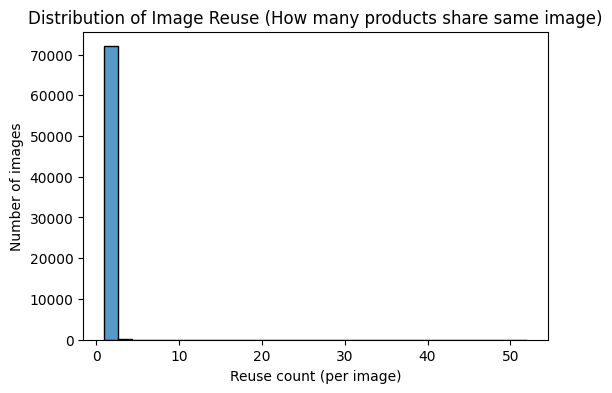


Sample Images Preview:


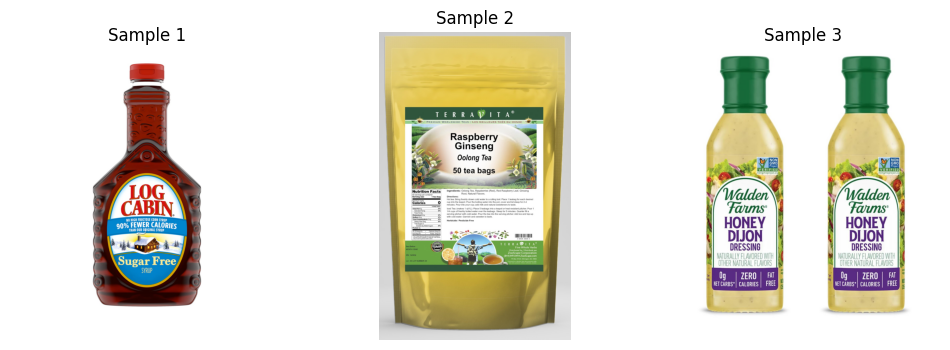

In [10]:

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

print(" Basic Image Column Info:\n")

# 1 Missing & unique image URLs
total_images = len(train)
unique_images = train['image_link'].nunique()
missing_images = train['image_link'].isna().sum()
duplicate_images = total_images - unique_images

print(f"Total rows: {total_images}")
print(f"Unique image links: {unique_images}")
print(f"Missing image links: {missing_images}")
print(f"Duplicate (reused) image links: {duplicate_images}")
print(f"Percentage reused: {(duplicate_images/total_images)*100:.2f}%")

# 2️ Check top reused images
reuse = train['image_link'].value_counts()
print("\nTop 5 most reused image links:")
print(reuse.head())

# 3️ Distribution of reuse counts
plt.figure(figsize=(6,4))
sns.histplot(reuse.values, bins=30)
plt.title("Distribution of Image Reuse (How many products share same image)")
plt.xlabel("Reuse count (per image)")
plt.ylabel("Number of images")
plt.show()

# 4️ Try loading and displaying 3 random valid images
print("\nSample Images Preview:")
sample_urls = train['image_link'].dropna().sample(3, random_state=42).values

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, url in enumerate(sample_urls):
    try:
        response = requests.get(url, timeout=5)
        img = Image.open(BytesIO(response.content))
        axes[i].imshow(img)
        axes[i].set_title(f"Sample {i+1}")
        axes[i].axis("off")
    except Exception as e:
        axes[i].text(0.5, 0.5, "Failed to load", ha='center', va='center', fontsize=10)
        axes[i].axis("off")

plt.show()


Phase 4 : Target column

 Target Variable Summary:

count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


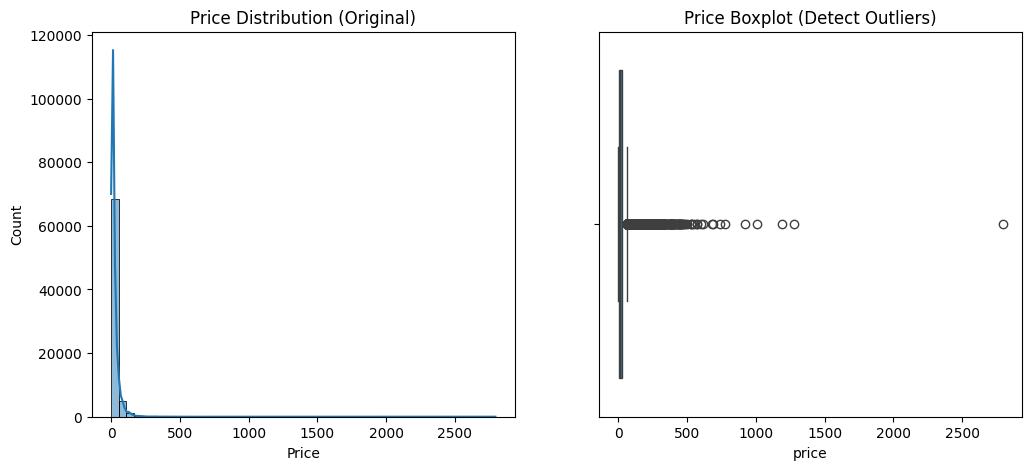


Skewness: 13.60
Kurtosis: 736.65


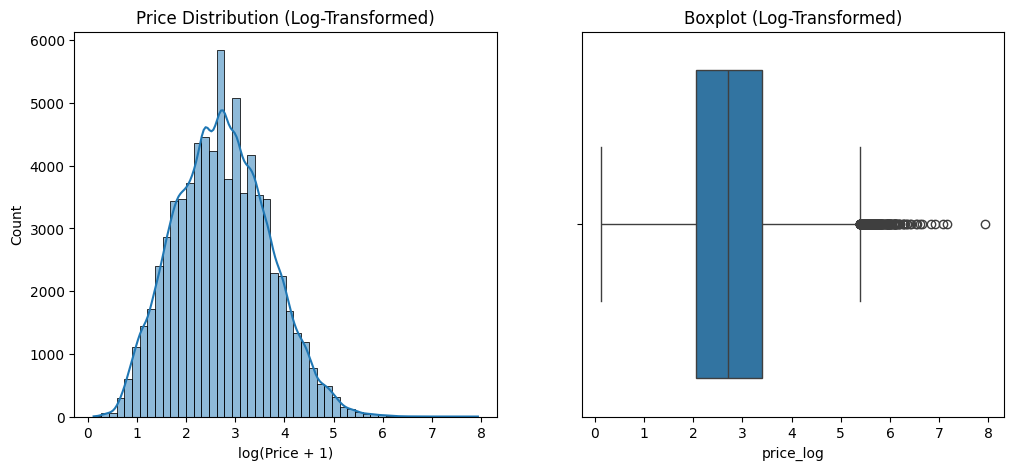


Outliers detected: 5524 (7.37% of data)
Lower bound: -25.95, Upper bound: 61.37

 Correlation of price with other numeric features:
price          1.000000
text_length    0.146752
word_count     0.144423
IPQ            0.020377
Name: price, dtype: float64


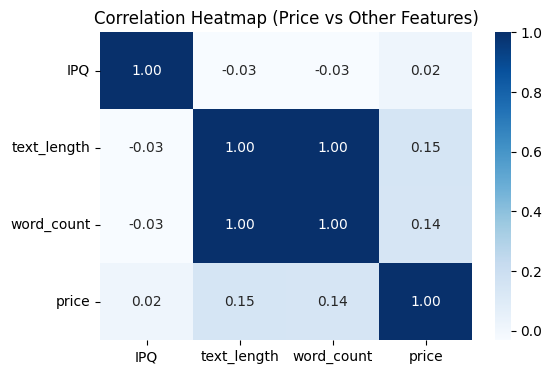

In [11]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print(" Target Variable Summary:\n")
print(train['price'].describe())

# 1️ Histogram & boxplot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train['price'], bins=50, kde=True)
plt.title("Price Distribution (Original)")
plt.xlabel("Price")

plt.subplot(1,2,2)
sns.boxplot(x=train['price'])
plt.title("Price Boxplot (Detect Outliers)")
plt.show()

# 2️Check skewness and kurtosis
skewness = train['price'].skew()
kurtosis = train['price'].kurt()
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

# 3.  Log-transform to reduce skewness
train['price_log'] = np.log1p(train['price'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train['price_log'], bins=50, kde=True)
plt.title("Price Distribution (Log-Transformed)")
plt.xlabel("log(Price + 1)")

plt.subplot(1,2,2)
sns.boxplot(x=train['price_log'])
plt.title("Boxplot (Log-Transformed)")
plt.show()

#  Outlier detection using IQR
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['price'] < lower_bound) | (train['price'] > upper_bound)]
print(f"\nOutliers detected: {len(outliers)} ({len(outliers)/len(train)*100:.2f}% of data)")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

# 5️ Correlation of Price with Numeric Features
numeric_cols = ['IPQ', 'text_length', 'word_count']
corrs = train[numeric_cols + ['price']].corr()['price'].sort_values(ascending=False)
print("\n Correlation of price with other numeric features:")
print(corrs)

# Optional: visualize correlations
plt.figure(figsize=(6,4))
sns.heatmap(train[numeric_cols + ['price']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Price vs Other Features)")
plt.show()


Phase 5: Relation between features

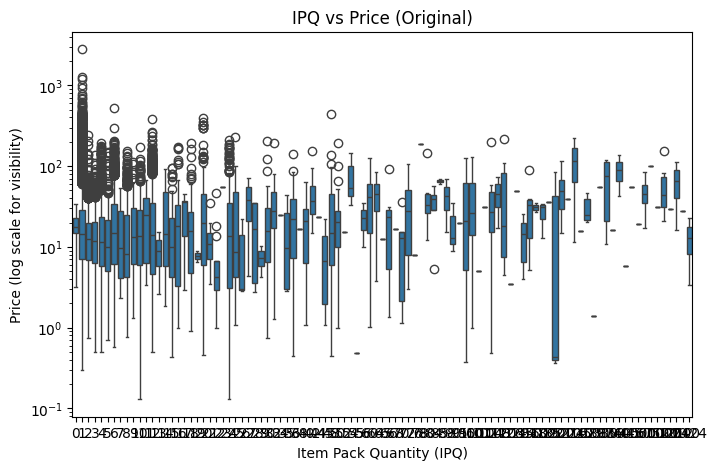

IPQ
78      190.080000
216     116.670000
600      99.000000
360      88.940000
54       77.666667
300      67.454286
85       65.400000
1212     64.450000
1000     62.155833
416      54.990000
Name: price, dtype: float64


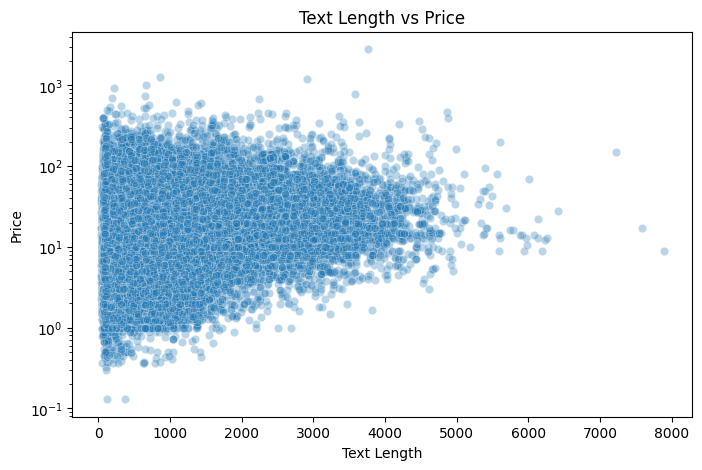

Correlation (Text length vs Price): 0.147

 Top 10 brands by average price:
brand_word
Item    23.647654
Name: price, dtype: float64


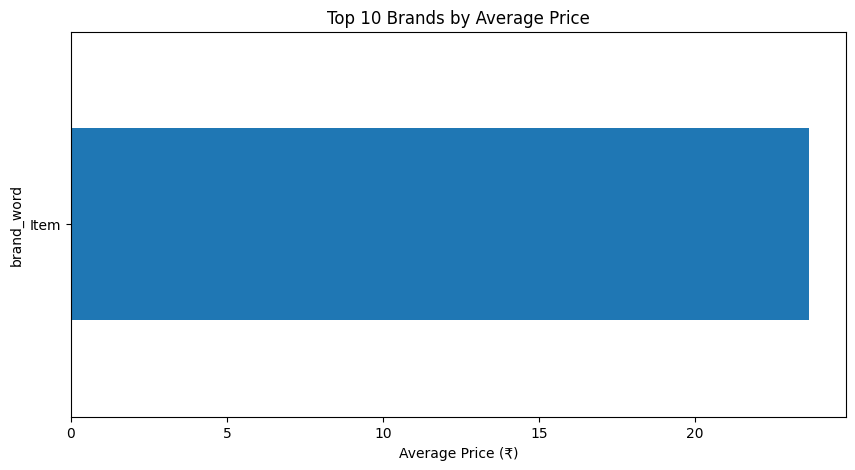

In [12]:
if 'price_log' not in train.columns:
    train['price_log'] = np.log1p(train['price'])


plt.figure(figsize=(8,5))
sns.boxplot(x='IPQ', y='price', data=train)
plt.title("IPQ vs Price (Original)")
plt.yscale('log')
plt.xlabel("Item Pack Quantity (IPQ)")
plt.ylabel("Price (log scale for visibility)")
plt.show()

print(train.groupby('IPQ')['price'].mean().sort_values(ascending=False).head(10))


plt.figure(figsize=(8,5))
sns.scatterplot(x='text_length', y='price', data=train, alpha=0.3)
plt.title("Text Length vs Price")
plt.xlabel("Text Length")
plt.ylabel("Price")
plt.yscale('log')
plt.show()


corr_len = train[['text_length', 'price']].corr().iloc[0,1]
print(f"Correlation (Text length vs Price): {corr_len:.3f}")

train['brand_word'] = train['catalog_content'].str.extract(r'(^[A-Za-z]+)')  # first word as brand proxy
brand_avg_price = train.groupby('brand_word')['price'].mean().sort_values(ascending=False).head(10)
print("\n Top 10 brands by average price:")
print(brand_avg_price)

plt.figure(figsize=(10,5))
brand_avg_price.sort_values().plot(kind='barh')
plt.title("Top 10 Brands by Average Price")
plt.xlabel("Average Price (₹)")
plt.show()


NLP task

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train['clean_text'] = train['catalog_content'].apply(clean_text)

In [14]:
print(train[['catalog_content', 'clean_text']].head(10))


                                     catalog_content  \
0  Item Name: La Victoria Green Taco Sauce Mild, ...   
1  Item Name: Salerno Cookies, The Original Butte...   
2  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   
5  Item Name: Member's Mark Member's Mark, Basil,...   
6  Item Name: Goya Foods Sazonador Total Seasonin...   
7  Item Name: VineCo Original Series Chilean Sauv...   
8  Item Name: NATURES PATH CEREAL FLK MULTIGRAIN ...   
9  Item Name: Mrs. Miller's Seedless Black Raspbe...   

                                          clean_text  
0  item name la victoria green taco sauce mild 12...  
1  item name salerno cookies the original butter ...  
2  item name bear creek hearty soup bowl creamy c...  
3  item name judee s blue cheese powder 11 25 oz ...  
4  item name kedem sherry cooking wine 12 7 ounce...  
5  item name member s mark member s mark basil 6 ... 

In [15]:
test['clean_text']  = test['catalog_content'].apply(clean_text)

In [16]:
print(test[['catalog_content', 'clean_text']].head(10))


                                     catalog_content  \
0  Item Name: Rani 14-Spice Eshamaya's Mango Chut...   
1  Item Name: Natural MILK TEA Flavoring extract ...   
2  Item Name: Honey Filled Hard Candy - Bulk Pack...   
3  Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz...   
4  Item Name: McCormick Culinary Vanilla Extract,...   
5  Item Name: Snyder's of Hanover Mini Pretzel, 1...   
6  Item Name: Oregon Plum Purple 15 oz (Pack of 3...   
7  Item Name: Barkman Honey 059640 Honey, Clover,...   
8  Item Name: Against The Grain Gluten Free Origi...   
9  Item Name: Nature Valley Granola Bars, Sweet a...   

                                          clean_text  
0  item name rani 14 spice eshamaya s mango chutn...  
1  item name natural milk tea flavoring extract b...  
2  item name honey filled hard candy bulk pack 2 ...  
3  item name vlasic snack mm s kosher dill 16 oz ...  
4  item name mccormick culinary vanilla extract 3...  
5  item name snyder s of hanover mini pretzel 16 ... 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
train['clean_text'] = train['clean_text'].str.replace(r'\b(bullet point|point)\b', '', regex=True)
test['clean_text']  = test['clean_text'].str.replace(r'\b(bullet point|point)\b', '', regex=True)


In [19]:

tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words='english'
)

In [20]:
X_train_text = tfidf.fit_transform(train['clean_text'])
X_test_text  = tfidf.transform(test['clean_text'])

print(f"TF-IDF Train Shape: {X_train_text.shape}")
print(f"TF-IDF Test Shape:  {X_test_text.shape}")

TF-IDF Train Shape: (75000, 10000)
TF-IDF Test Shape:  (75000, 10000)


In [21]:
feature_names = np.array(tfidf.get_feature_names_out())

mean_tfidf = X_train_text.mean(axis=0).A1
top_indices = mean_tfidf.argsort()[::-1][:20]

print("\nTop 20 important terms by TF-IDF:")
for word in feature_names[top_indices]:
    print("-", word)


Top 20 important terms by TF-IDF:
- ounce
- oz
- tea
- item
- value
- unit
- free
- pack
- coffee
- unit ounce
- organic
- count
- value unit
- 12
- flavor
- product
- chocolate
- fl
- fl oz
- unit count


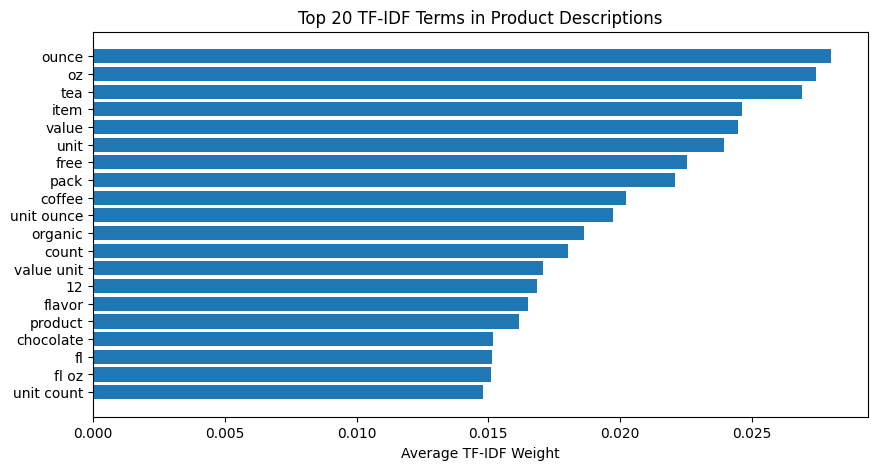

In [22]:


plt.figure(figsize=(10,5))
plt.barh(feature_names[top_indices][::-1], mean_tfidf[top_indices][::-1])
plt.title("Top 20 TF-IDF Terms in Product Descriptions")
plt.xlabel("Average TF-IDF Weight")
plt.show()

In [25]:

def extract_ipq(text):
    match = re.search(r'IPQ[:\-]?\s*(\d+)', str(text))
    return int(match.group(1)) if match else 1

train['IPQ'] = train['catalog_content'].apply(extract_ipq)
test['IPQ']  = test['catalog_content'].apply(extract_ipq)

train['text_length'] = train['catalog_content'].apply(lambda x: len(str(x)))
test['text_length']  = test['catalog_content'].apply(lambda x: len(str(x)))

train['word_count'] = train['catalog_content'].apply(lambda x: len(str(x).split()))
test['word_count']  = test['catalog_content'].apply(lambda x: len(str(x).split()))


In [28]:
print(train[['IPQ', 'text_length', 'word_count']].head(10))
print(test[['IPQ', 'text_length', 'word_count']].head(10))

   IPQ  text_length  word_count
0    1           91          18
1    1          511          80
2    1          328          59
3    1         1318         211
4    1          155          28
5    1          222          38
6    1         1332         229
7    1         2289         358
8    1           93          18
9    1         1054         184
   IPQ  text_length  word_count
0    1         1274         205
1    1         1720         271
2    1          769         134
3    1           82          15
4    1         1491         236
5    1          152          28
6    1          677         119
7    1          394          63
8    1          140          23
9    1          788         135


In [30]:
display(train)
display(test)

,sample_id,catalog_content,image_link,price,text_length,word_count,IPQ,price_log,brand_word,clean_text
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,91,18,1,1.773256,Item,item name la victoria green taco sauce mild 12...
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,511,80,1,2.647592,Item,item name salerno cookies the original butter ...
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,328,59,1,1.088562,Item,item name bear creek hearty soup bowl creamy c...
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,1318,211,1,3.444895,Item,item name judee s blue cheese powder 11 25 oz ...
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,155,28,1,4.211979,Item,item name kedem sherry cooking wine 12 7 ounce...
...,...,...,...,...,...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,772,130,1,2.433175,Item,item name ice breakers spearmint sugar free mi...
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,1707,275,1,3.608753,Item,item name davidson s organics vanilla essence ...
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,142,23,1,3.938275,Item,item name jolly rancher hard candy blue raspbe...
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,899,138,1,2.789630,Item,item name nescafe dolce gusto capsules caramel...


,sample_id,catalog_content,image_link,clean_text,IPQ,text_length,word_count
0,100179,Item Name: Rani 14-Spice Eshamaya's Mango Chut...,https://m.media-amazon.com/images/I/71hoAn78AW...,item name rani 14 spice eshamaya s mango chutn...,1,1274,205
1,245611,Item Name: Natural MILK TEA Flavoring extract ...,https://m.media-amazon.com/images/I/61ex8NHCIj...,item name natural milk tea flavoring extract b...,1,1720,271
2,146263,Item Name: Honey Filled Hard Candy - Bulk Pack...,https://m.media-amazon.com/images/I/61KCM61J8e...,item name honey filled hard candy bulk pack 2 ...,1,769,134
3,95658,Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz...,https://m.media-amazon.com/images/I/51Ex6uOH7y...,item name vlasic snack mm s kosher dill 16 oz ...,1,82,15
4,36806,"Item Name: McCormick Culinary Vanilla Extract,...",https://m.media-amazon.com/images/I/71QYlrOMoS...,item name mccormick culinary vanilla extract 3...,1,1491,236
...,...,...,...,...,...,...,...
74995,93616,Item Name: Good Seasons Zezty Italian Salad Dr...,https://m.media-amazon.com/images/I/51e9H27lgv...,item name good seasons zezty italian salad dre...,1,297,54
74996,249434,"Item Name: Colombina Swirled Love Tiger Pops, ...",https://m.media-amazon.com/images/I/61IpkExmVt...,item name colombina swirled love tiger pops st...,1,3087,469
74997,162217,"Item Name: Kerns, Guava Nectar, 11.5 Fl Oz Can...",https://m.media-amazon.com/images/I/A1NMggyCLz...,item name kerns guava nectar 11 5 fl oz can k...,1,113,21
74998,230487,Item Name: NY SPICE SHOP Licorice Candy - 1 Po...,https://m.media-amazon.com/images/I/81P69kEP5q...,item name ny spice shop licorice candy 1 pound...,1,3300,567


In [31]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack, csr_matrix

numeric_cols = ['IPQ', 'text_length', 'word_count']

scaler = StandardScaler()
X_train_num = scaler.fit_transform(train[numeric_cols])
X_test_num  = scaler.transform(test[numeric_cols])

print("Numeric feature shapes:")
print(X_train_num.shape, X_test_num.shape)


Numeric feature shapes:
(75000, 3) (75000, 3)


In [32]:
X_train_full = hstack([X_train_text, csr_matrix(X_train_num)])
X_test_full  = hstack([X_test_text, csr_matrix(X_test_num)])

print("Combined feature matrix shapes:")
print(X_train_full.shape, X_test_full.shape)

y_train = train['price_log']


Combined feature matrix shapes:
(75000, 10003) (75000, 10003)


In [34]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define model
lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
lgb_model.fit(X_train_full, y_train)

# Predict
train_pred_log = lgb_model.predict(X_train_full)
test_pred_log  = lgb_model.predict(X_test_full)

# Reverse log-transform
train_pred = np.expm1(train_pred_log)
test_pred  = np.expm1(test_pred_log)
y_true     = np.expm1(y_train)

# Evaluate
mae  = mean_absolute_error(y_true, train_pred)
rmse = np.sqrt(mean_squared_error(y_true, train_pred))
smape_score = smape(y_true, train_pred)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, SMAPE: {smape_score:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 22.108115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989816
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 9989
[LightGBM] [Info] Start training from score 2.739217


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MAE: 9.9397, RMSE: 24.8341, SMAPE: 44.92%
